In [103]:
# first some imports
import cdsapi #Interface into ERA5 data
import pyart # The Python ARM Radar Toolkit
import cartopy.crs as ccrs # A toolkit for map projections
import cartopy.feature as cfeature # A method for adding coastlines etc
import cartopy.io.img_tiles as cimgt # an API into things like google maps
import numpy as np #The famous numpy package!
from matplotlib import pyplot as plt
import os
import xarray as xr
#Now a Jupyter "Magic" for plotting inline
%matplotlib inline

In [ ]:
# If the ~/data directory has not been populated run this line
!cd
!source binder/start

In [88]:
#Load the radar, this time using the ODIM reader
radar = pyart.aux_io.read_odim_h5(os.path.expanduser('~/data/20171230/20171230_172408_FAIRS.h5'))

In [89]:
#lets see what is in here!
#How many sweeps?
print(radar.nsweeps)

12


In [90]:
#What tilts?
print(radar.fixed_angle['data'])

[[ 0.5]
 [ 1.3]
 [ 2.3]
 [ 3.4]
 [ 4.7]
 [ 6.2]
 [ 7.9]
 [ 9.9]
 [12.2]
 [16.8]
 [22. ]
 [30. ]]


In [91]:
#what fields
print(radar.fields.keys())

dict_keys(['total_power', 'reflectivity', 'velocity'])


In [92]:
#range?
print(radar.range['data'][-1]/1000.0)

199.5


# Lets plot a PPI

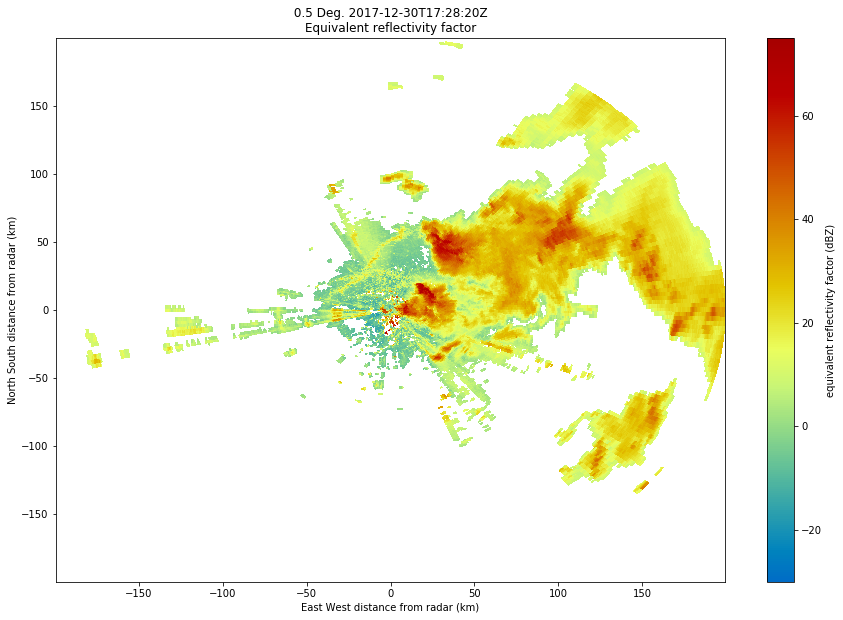

In [93]:
my_figure = plt.figure(figsize=[15,10])
my_radar_display = pyart.graph.RadarDisplay(radar)
my_radar_display.plot_ppi('reflectivity', 0)

min_lat: -27.705198008987075  min_lon: 26.21686813667718  max_lat: -24.118433991012935  max_lon: 30.204663868634427


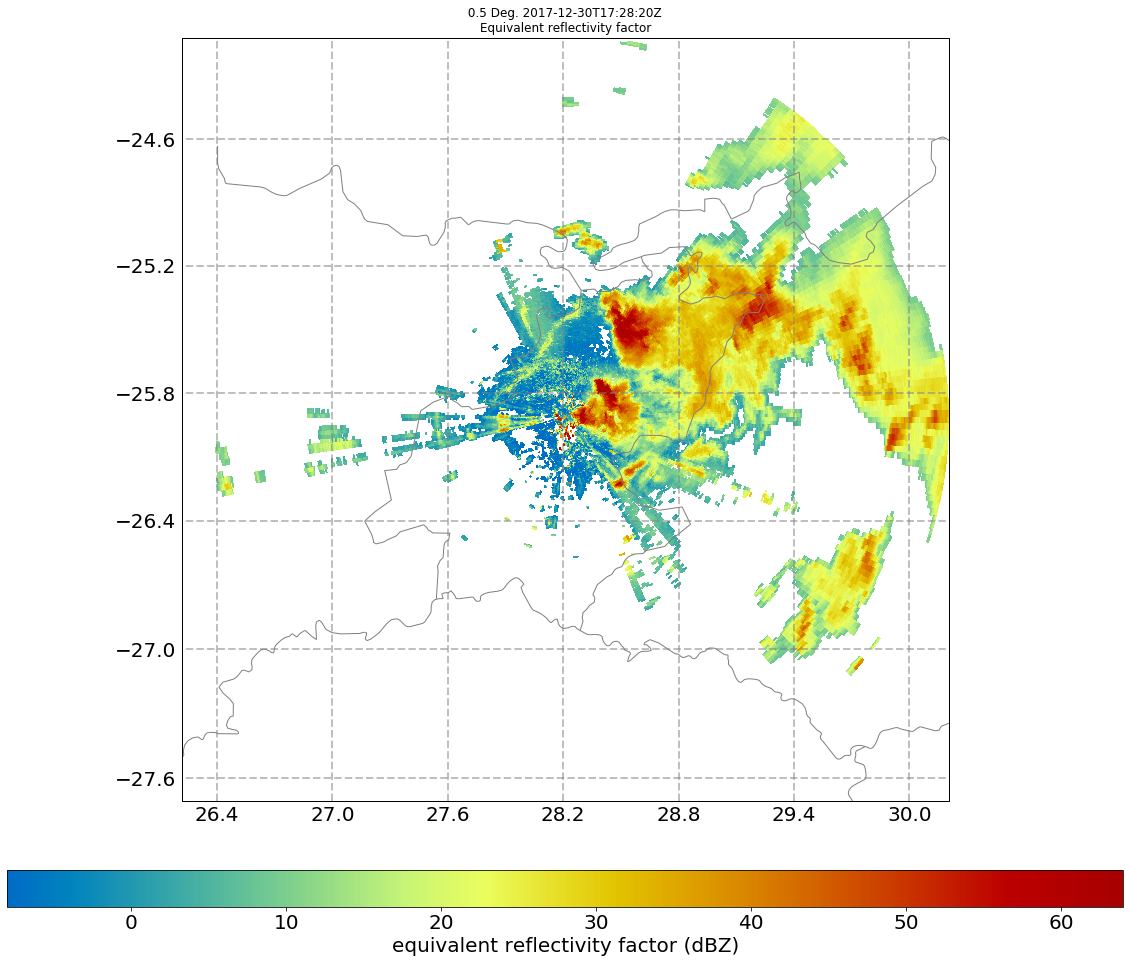

In [94]:
#pretty! but no context!
#lets use the Cartopy package to plot on a map

#I get a bit geeky on this... 

# lets get the extent of the data

lats = radar.gate_latitude
lons = radar.gate_longitude

min_lon = lons['data'].min()
min_lat = lats['data'].min()
max_lat = lats['data'].max()
max_lon = lons['data'].max()

print('min_lat:', min_lat, ' min_lon:', min_lon, 
      ' max_lat:', max_lat, ' max_lon:', max_lon)


#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)
lat_0 = display.loc[0]
lon_0 = display.loc[1]

# Set up the GIS projection
projection = ccrs.Mercator(
                central_longitude=lon_0,
                min_latitude=min_lat, max_latitude=max_lat)

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'reflectivity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-8, vmax=64,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('reflectivity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

In [95]:
print(radar.fields['velocity']['data'].max())
print(radar.fields['velocity']['data'].min())

38.050552
-37.114883


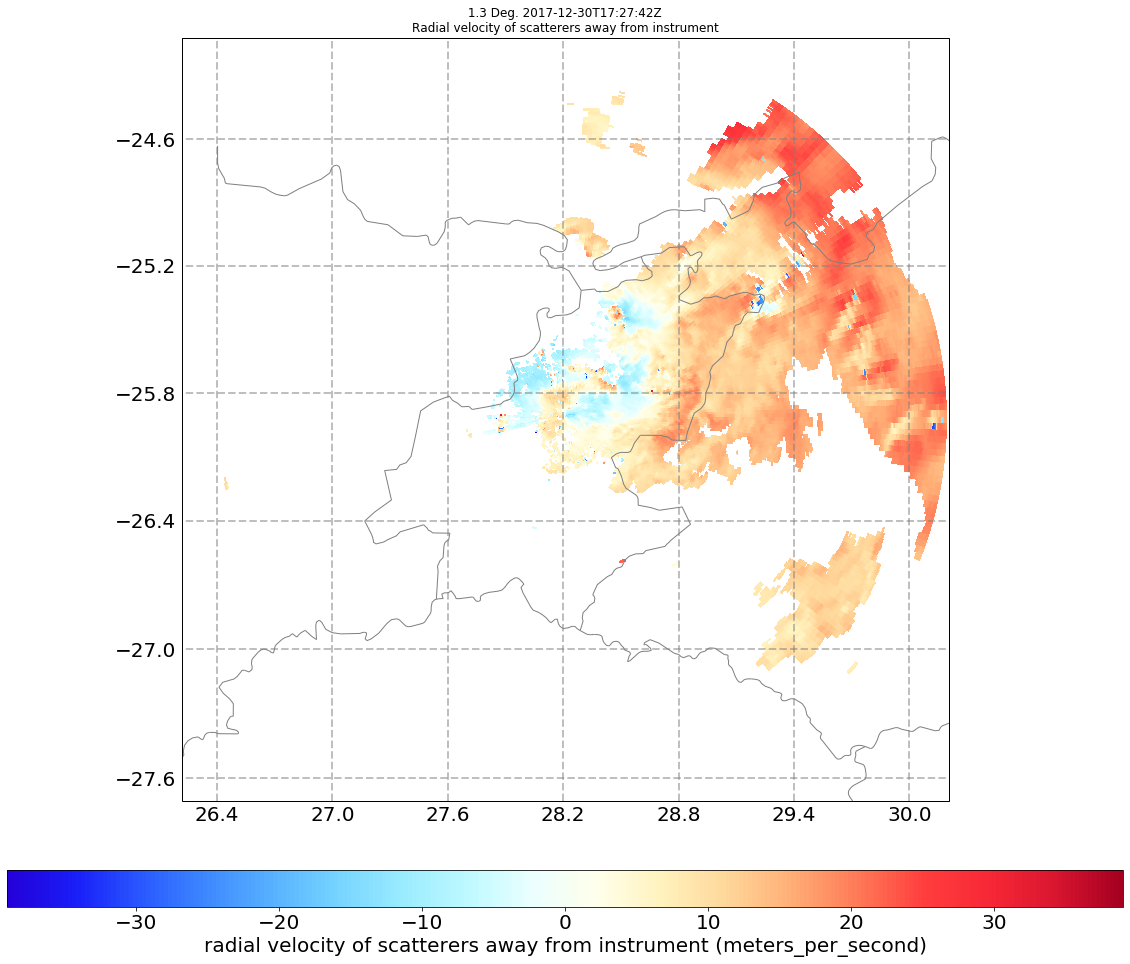

In [96]:
nyq = 39
#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)
lat_0 = display.loc[0]
lon_0 = display.loc[1]

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'velocity', 1,
    projection=projection, colorbar_flag=False,
    min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
    vmin=-nyq, vmax=nyq,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('velocity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

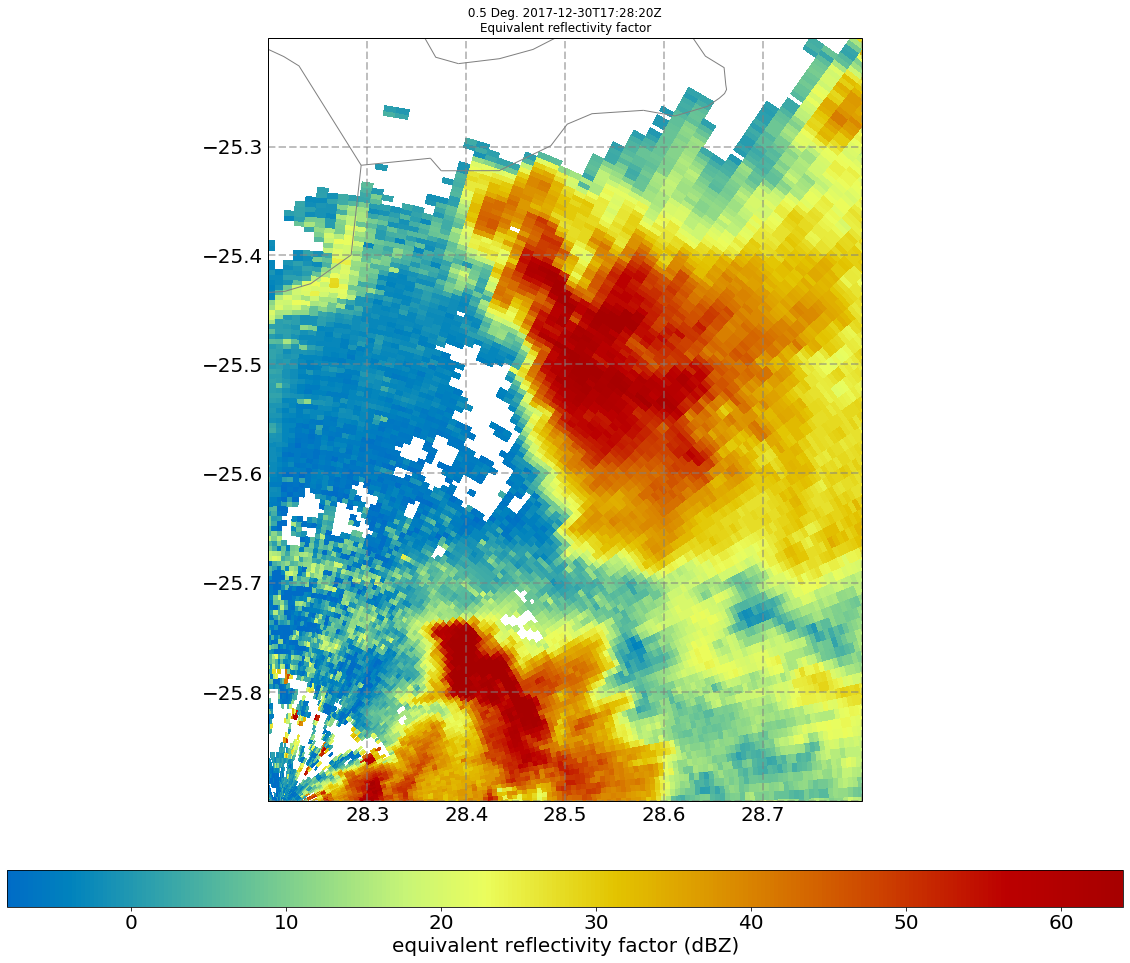

In [97]:
#pretty! but no context!
#lets use the Cartopy package to plot on a map

#I get a bit geeky on this... 

# lets get the extent of the data


#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'reflectivity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=28.2, max_lon=28.8, min_lat=-25.9, max_lat=-25.2,
    vmin=-8, vmax=64,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('reflectivity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

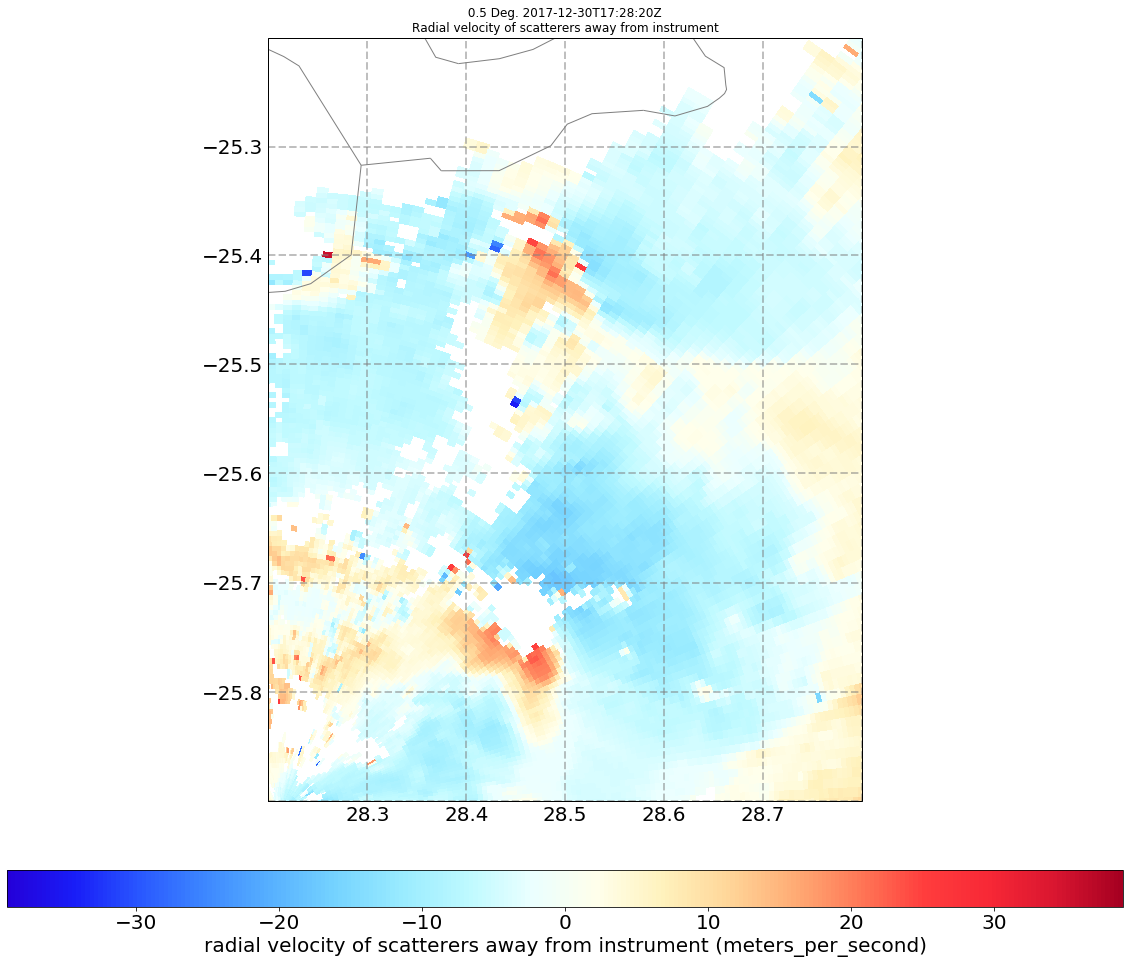

In [101]:
#pretty! but no context!
#lets use the Cartopy package to plot on a map

#I get a bit geeky on this... 

# lets get the extent of the data


#set up the plot
myf = plt.figure(figsize=[20,18])
display = pyart.graph.RadarMapDisplay(radar)

#plot a PPI. We specifically ask Py-ART not to add the colorbar... 
#We will customize this to make it nice.

display.plot_ppi_map(
    'velocity', 0,
    projection=projection, colorbar_flag=False,
    min_lon=28.2, max_lon=28.8, min_lat=-25.9, max_lat=-25.2,
    vmin=-nyq, vmax=nyq,
    resolution='10m')


#here is our pretty colorbar code
lb = display._get_colorbar_label('velocity')
cb = plt.colorbar(display.plots[0], aspect=30, pad=0.07, 
                  orientation='horizontal')

cb.ax.tick_params(labelsize=20)

cb.set_label(lb, fontsize=20)

#Now we add lat lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5,
                          linestyle='--')

gl.xlabel_style = {'size': 20}
gl.ylabel_style = {'size': 20}

gl.xlabels_top = False
gl.ylabels_right = False

In [98]:
# Lets explore structure with a sythetic RHI
rhi_radar = pyart.util.xsect.cross_section_ppi(radar, [55])

(0, 15)

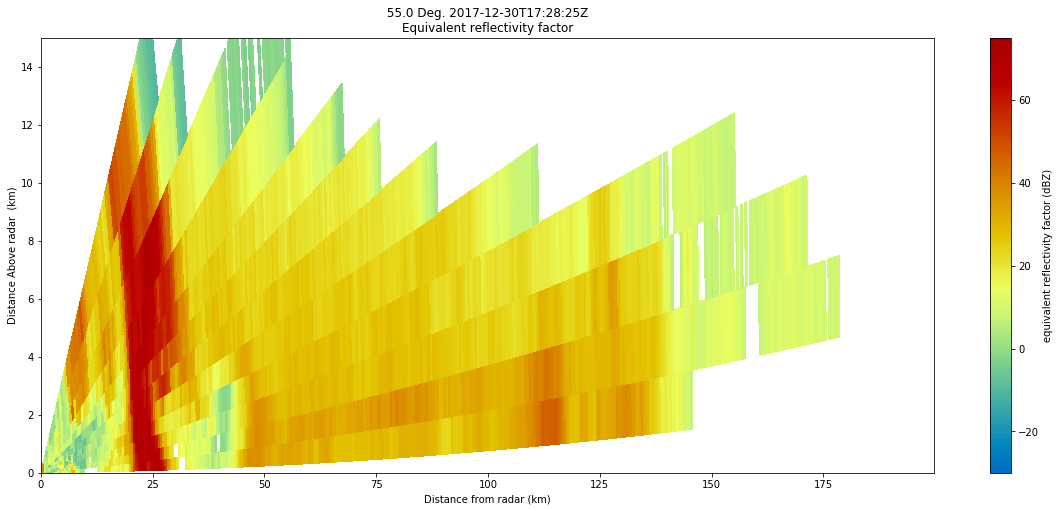

In [99]:
myf = plt.figure(figsize=[20,8])
display = pyart.graph.RadarDisplay(rhi_radar)
display.plot_rhi('reflectivity', 0)
plt.ylim([0,15])


(0, 15)

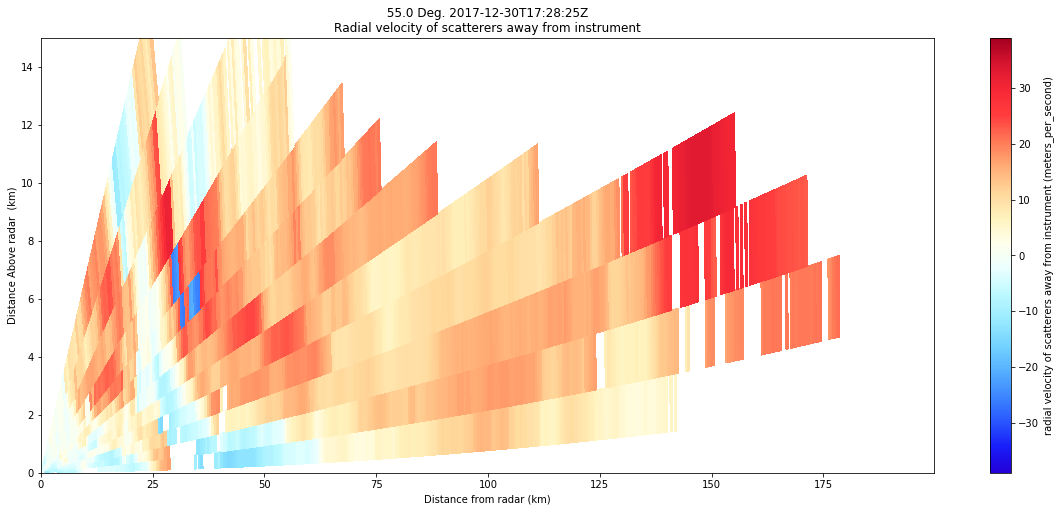

In [100]:
myf = plt.figure(figsize=[20,8])
display = pyart.graph.RadarDisplay(rhi_radar)
display.plot_rhi('velocity', 0, vmin=-nyq, vmax=nyq)
plt.ylim([0,15])


In [102]:
#we have doppler velocity alaising! 

In [104]:
#get profile from reanalysis
dset = xr.load_dataset(os.path.expanduser('~/data/era5_data.nc'))

In [105]:
cprof = dset.sel(longitude=28.5, latitude=-26.0, method='nearest')

In [107]:
#Geopotential height to height... ish...
height = cprof.z/(9.8)

In [113]:
profile = pyart.core.HorizontalWindProfile.from_u_and_v(
        height[0].values, cprof.u[0].values , cprof.v[0].values)

In [114]:
sim_vel = pyart.util.simulated_vel_from_profile(radar, profile)
radar.add_field('simulated_velocity', sim_vel, replace_existing=True)

In [116]:
corr_vel = pyart.correct.dealias_region_based(radar, vel_field='velocity', 
                                              ref_vel_field='simulated_velocity', 
                                              keep_original=False, 
                                              centered=True, nyquist_vel=39.0)

/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/correct/region_dealias.py:243: UserWarning: Warning: converting a masked element to nan.
  sref_means[reg-1] = np.ma.mean(sref[labels_corr == reg])


In [117]:
radar.add_field('corrected_velocity', corr_vel, replace_existing=True)

In [118]:
# Lets explore structure with a sythetic RHI
rhi_radar = pyart.util.xsect.cross_section_ppi(radar, [55])


(0, 15)

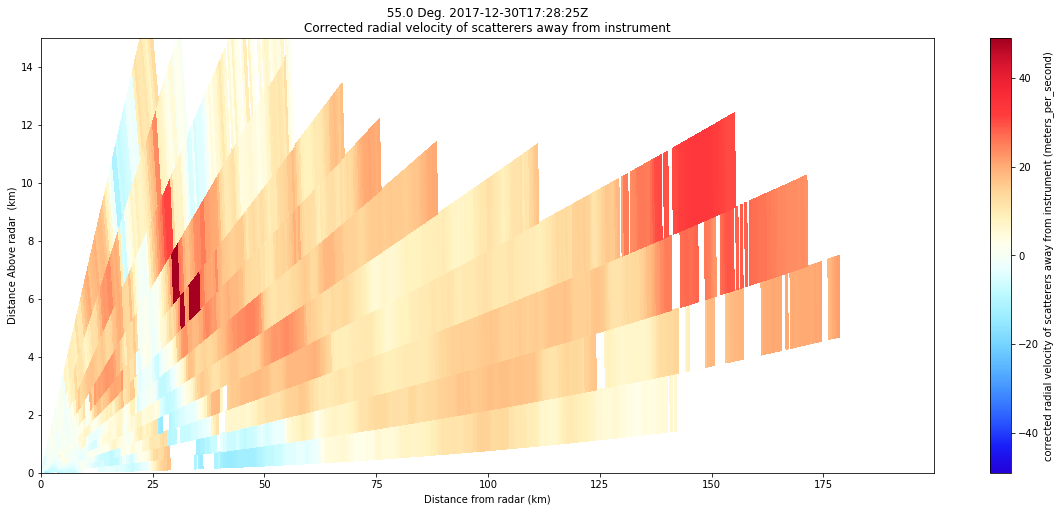

In [121]:
myf = plt.figure(figsize=[20,8])
display = pyart.graph.RadarDisplay(rhi_radar)
display.plot_rhi('corrected_velocity', 0, vmin=-nyq - 10, vmax=nyq + 10)
plt.ylim([0,15])
